In [23]:

#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA
import seaborn




In [6]:
!ls *pkl


acs_s.pkl  AgeSexRace.pkl  econ.pkl  housing.pkl  misc.pkl


In [8]:
acs = pd.read_pickle('acs_s.pkl')

In [10]:
acs.info()
acs.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 135 entries, town to p_spk_engl
dtypes: float64(130), object(5)
memory usage: 596.0+ KB


Index(['town', 'county', 'state', 'FIPS', 'city_town', 'p_in_lab',
       'p_unemployed', 'p_fem_labforce', 'p_fem_employed', 'p_ch6_paremp',
       ...
       'p_civdis_18', 'p_civdis_1864', 'p_civdis_65', 'p_samehouse',
       'p_diffhousUS', 'p_abroad1yr', 'p_nativeUS', 'p_nativestate',
       'p_nat_citz', 'p_spk_engl'],
      dtype='object', length=135)

In [11]:
X = acs.loc[:,'p_in_lab':'p_spk_engl']

In [15]:
X_std = StandardScaler().fit_transform(X)

In [16]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00177305  0.25251121  0.82222118 ...,  0.11015002 -0.07539666
  -0.12451344]
 [ 0.25251121  1.00177305  0.34133329 ...,  0.16824989 -0.24296061
  -0.11407499]
 [ 0.82222118  0.34133329  1.00177305 ...,  0.21713188 -0.11029328
  -0.0917106 ]
 ..., 
 [ 0.11015002  0.16824989  0.21713188 ...,  1.00177305  0.15487932
   0.55843853]
 [-0.07539666 -0.24296061 -0.11029328 ...,  0.15487932  1.00177305
   0.34409575]
 [-0.12451344 -0.11407499 -0.0917106  ...,  0.55843853  0.34409575
   1.00177305]]


In [17]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -1.11156084e-02   7.66513296e-02   1.77386932e-01 ...,   5.86149284e-04
    1.02922483e-03   5.95375552e-04]
 [ -1.14134467e-01  -3.58118169e-02   9.27721591e-02 ...,  -2.58736519e-04
    5.52547215e-05   4.55576608e-04]
 [ -4.16194475e-02   3.69066537e-02   2.12463177e-01 ...,  -6.30318989e-04
   -1.80723315e-04  -3.41884592e-03]
 ..., 
 [  1.45079587e-02  -1.69524162e-01   1.23706544e-01 ...,  -3.09324332e-04
    1.72934028e-04  -5.54435011e-04]
 [  9.98764387e-02  -4.99620256e-02   1.04776567e-02 ...,  -2.61927066e-04
    3.63707489e-04  -6.69131922e-05]
 [  8.91319722e-02  -1.93990915e-01   1.04651204e-02 ...,  -2.36653547e-03
    3.11450417e-04   7.06075709e-04]]

Eigenvalues 
[  2.84166957e+01   1.31928613e+01   1.03285404e+01   5.25000361e+00
   3.84876839e+00   3.66981466e+00   3.11246540e+00   2.57981238e+00
   2.55809068e+00   2.17927323e+00   2.07368533e+00   1.95895275e+00
   1.92160624e+00   1.75315789e+00   1.61330259e+00   1.53845256e+00
   1.47391321e+0

In [18]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
28.416695744
13.1928613424
10.3285404207
5.25000360591
3.84876839287
3.66981465949
3.11246539564
2.57981238231
2.55809067763
2.17927323019
2.07368533042
1.95895274708
1.92160623633
1.7531578878
1.61330259037
1.538452559
1.4739132094
1.39421314483
1.30891963674
1.28208107748
1.22115021155
1.19368844766
1.15971367983
1.10059918384
1.0871998046
1.0443758688
1.01672184557
0.989669348933
0.924853168879
0.908468506135
0.879849667839
0.843514403393
0.848170139895
0.816912701861
0.799715251862
0.742528556043
0.780989145131
0.772104095013
0.711810116842
0.68559030582
0.655763244026
0.649247755747
0.633007495157
0.616634280823
0.62334047324
0.598278897403
0.588260400517
0.566827280285
0.530295259824
0.521770971339
0.489287531052
0.506460901763
0.474444077215
0.460194387429
0.447970816776
0.434061704634
0.425593517989
0.413467204248
0.405952303022
0.399928175281
0.388681534217
0.37228055816
0.363764704459
0.355719067991
0.345603904592
0.337425370744
0.325642632213

In [26]:
pca = PCA(n_components=4)
pca.fit_transform(X_std)
print (pca.explained_variance_ratio_) 

[ 0.21820308  0.10130393  0.07930969  0.04031317]


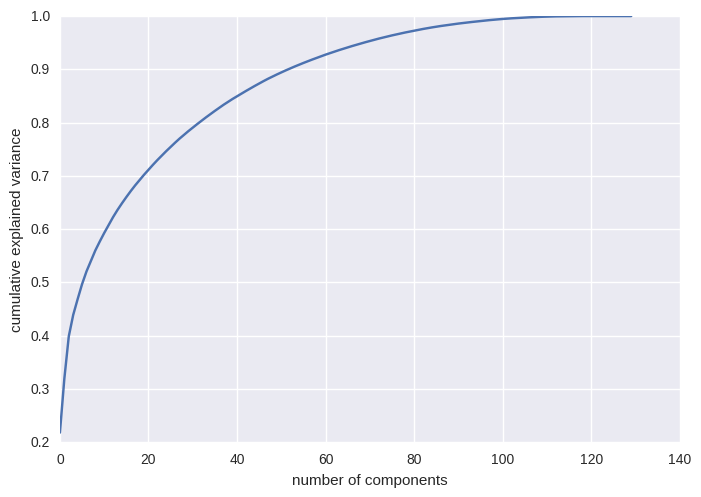

In [27]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()